# <center><font color = '#DF9166' size = 20 center> **User Satisfaction Analysis**</font></center>


## <font color = '#DF9166' size=6>**Table of content**<font/><a class = 'anchor' id = 'introduction'/>

1. [**Import Libraries**](#import)
2. [**Data Loading**](#data_loading)
3. [**Data Inspection**](#data_inspection)
4. [**Data Preprocessing**](#data_preprocessing)
5. [**Engagement and Experience Scores**](#engagement_Experience)
6. [**Satisfaction Analysis**](#satisfaction_analysis)
7. [**Regression Model**](#regression_model)
8. [**Cluster Analysis** ](#cluster_analysis)
9. [**Export to Database**](#export_database)

## <font color = '#DF9166' size=6>**Import Libraries**</font><a class = 'anchor' id = 'import'/>


In [2]:
import sys
import os

sys.path.append(os.path.abspath(os.path.pardir))

In [91]:

import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import psycopg2
from sqlalchemy import create_engine
from dotenv import load_dotenv


In [3]:
from src.utils.connect_db import *

In [4]:
warnings.filterwarnings('ignore')

In [5]:
sns.set_style("whitegrid")

In [6]:
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_columns', None)

## <font color = '#DF9166' size=6>**Data Loading**</font><a class = 'anchor' id = 'data_loading'/>

In [41]:
DATA_PATH = 'C:/dev/Side-Projects/10 Acadamy/W2 Challenge/User Engagement and Satisfaction Analysis/data/data_with_experience_and_engagement_cluster.csv'

In [42]:
df = pd.read_csv(DATA_PATH)
df.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),engagement_cluster,Total Throughput,Total TCP Retransmission,experiance_cluster
0,13114483460844900352,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,105129.387473,208201448079117,33664962239,35521209507511,9.16456699548519E+015,42.0,5.0,23.0,44.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,37624.0,38787.0,1.051299e+08,Samsung,Samsung Galaxy A5 Sm-A520F,999.337217,344.396838,820.561387,150.489103,976.53392,142.794436,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,2,67.0,2.180247e+07,0
1,13114483482878900224,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,105129.387473,208201909211140,33681854413,35794009006359,L77566A,65.0,5.0,16.0,26.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,168.0,3560.0,1.051299e+08,Samsung,Samsung Galaxy J5 (Sm-J530),999.337217,344.396838,820.561387,150.489103,976.53392,142.794436,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,2,42.0,2.180247e+07,2


## <font color = '#DF9166' size=6>**Data Inspection**</font><a class = 'anchor' id = 'data_inspection'/>

In [43]:
print(f"Shape of the Dataset: {df.shape}")

Shape of the Dataset: (148346, 59)


In [44]:
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148346 entries, 0 to 148345
Data columns (total 59 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 148346 non-null  uint64 
 1   Start                                     148346 non-null  object 
 2   Start ms                                  148346 non-null  float64
 3   End                                       148346 non-null  object 
 4   End ms                                    148346 non-null  float64
 5   Dur. (ms)                                 148346 non-null  float64
 6   IMSI                                      148346 non-null  int64  
 7   MSISDN/Number                             148346 non-null  int64  
 8   IMEI                                      148346 non-null  int64  
 9   Last Location Name                        148346 non-null  object 
 10  Avg R

## <font color = '#DF9166' size=6>**Data Preprocessing**<font/><a class = 'anchor' id = 'data_preprocessing'/>


In [45]:
CATEGORICAL_COLUMNS = [
    "Bearer Id",
    "IMSI",
    "MSISDN/Number",
    "IMEI",
    "Last Location Name",
    "Handset Manufacturer",
    "Handset Type",
    'Start', 
    'End'
]

In [46]:
features = df.drop(CATEGORICAL_COLUMNS, axis=1)

features.head(2)

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),engagement_cluster,Total Throughput,Total TCP Retransmission,experiance_cluster
0,770.0,662.0,105129.387473,42.0,5.0,23.0,44.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,37624.0,38787.0,1.051299e+08,999.337217,344.396838,820.561387,150.489103,976.53392,142.794436,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,2,67.0,2.180247e+07,0
1,235.0,606.0,105129.387473,65.0,5.0,16.0,26.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,168.0,3560.0,1.051299e+08,999.337217,344.396838,820.561387,150.489103,976.53392,142.794436,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,2,42.0,2.180247e+07,2


In [48]:
print(f"Shape of the features DataFrame: {features.shape}")

Shape of the features DataFrame: (148346, 50)


In [49]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148346 entries, 0 to 148345
Data columns (total 50 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Start ms                                  148346 non-null  float64
 1   End ms                                    148346 non-null  float64
 2   Dur. (ms)                                 148346 non-null  float64
 3   Avg RTT DL (ms)                           148346 non-null  float64
 4   Avg RTT UL (ms)                           148346 non-null  float64
 5   Avg Bearer TP DL (kbps)                   148346 non-null  float64
 6   Avg Bearer TP UL (kbps)                   148346 non-null  float64
 7   TCP DL Retrans. Vol (Bytes)               148346 non-null  float64
 8   TCP UL Retrans. Vol (Bytes)               148346 non-null  float64
 9   DL TP < 50 Kbps (%)                       148346 non-null  float64
 10  50 Kbps < DL TP < 25

## <font color = '#DF9166' size=6>**Engagement and Experience Scores**<font/><a class = 'anchor' id = 'engagement_Experience'/>


In [50]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


In [51]:
# Calculate the centroid of the least engaged cluster (assuming cluster 0 is the least engaged)
engagement_cluster_centroid = features[features['engagement_cluster'] == 0].mean()

# Calculate the engagement score for each row in the features DataFrame
# The engagement score is the Euclidean distance between each row and the engagement cluster centroid
df['engagement_score'] = features.apply(lambda row: euclidean_distance(row, engagement_cluster_centroid), axis=1)

In [55]:
experience_cluster_centroid = features[features['experiance_cluster'] == 0].mean()
df['experience_score'] = features.apply(lambda row: euclidean_distance(row, experience_cluster_centroid), axis=1)

## <font color = '#DF9166' size=6>**Satisfaction Analysis**</font><a class = 'anchor' id = 'satisfaction_analysis'/>

### Calculate Satisfaction Score

In [58]:
df['satisfaction_score'] = df[['engagement_score', 'experience_score']].mean(axis=1)

In [60]:
df[['MSISDN/Number', 'engagement_score', 'experience_score', 'satisfaction_score']].head(3)

,MSISDN/Number,engagement_score,experience_score,satisfaction_score
0,33664962239,3.596096e+08,3.224704e+08,3.410400e+08
1,33681854413,2.524437e+08,2.946892e+08,2.735664e+08
2,33760627129,3.147089e+08,2.601182e+08,2.874136e+08


### Top 10 Satisfied Customers

In [66]:
top_10_satisfied = df.sort_values(by='satisfaction_score', ascending=False).head(10)
print("Top 10 Satisfied Customers based on Satisfaction Score:")
top_10_satisfied[['MSISDN/Number', 'satisfaction_score']]


Top 10 Satisfied Customers based on Satisfaction Score:


,MSISDN/Number,satisfaction_score
16512,33622601043,7.681868e+08
63162,33650923779,7.643082e+08
59215,33761792419,7.621835e+08
36696,33650112115,7.618781e+08
93887,33684671242,7.606043e+08
127220,33660601939,7.594155e+08
99418,33669531953,7.589725e+08
36561,33668129370,7.585982e+08
3689,33664486422,7.565720e+08
116775,33659468761,7.560893e+08


## <font color = '#DF9166' size=6>**Regression Model**</font><a class = 'anchor' id = 'regression_model'/>

In [103]:
cat_cols = pd.concat(
    [
        features[["engagement_cluster", "experiance_cluster"]],
        df[["Handset Manufacturer"]],
    ],
    axis=1,
)
num_cols = features.drop(['engagement_cluster', 'experiance_cluster'], axis=1)

In [104]:
# Min-Max scaling for numeric columns
scaler = MinMaxScaler()
# Scale the numeric columns
num_cols_scaled = scaler.fit_transform(num_cols) 
# Convert back to DataFrame
num_cols_scaled = pd.DataFrame(num_cols_scaled, columns=num_cols.columns)

# One-Hot Encoding for categorical columns (engagement_cluster, experience_cluster, Handset Manufacturer)
cat_cols_encoded = pd.get_dummies(cat_cols, drop_first=True)

# Concatenate the scaled numeric columns and the one-hot encoded categorical columns
X = pd.concat([num_cols_scaled, cat_cols_encoded], axis=1)

# Display the final data (optional)
X.head()


,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Throughput,Total TCP Retransmission,engagement_cluster,experiance_cluster,Handset Manufacturer_ASUSTeK,Handset Manufacturer_Acer,Handset Manufacturer_Adar,Handset Manufacturer_Alif Communications,Handset Manufacturer_Apple,Handset Manufacturer_Archos SA,Handset Manufacturer_Archos Sa,Handset Manufacturer_Asustek,Handset Manufacturer_Avenir Telecom,Handset Manufacturer_Beijing Shenqi Technology Co Ltd,Handset Manufacturer_Bird,Handset Manufacturer_Blu Products Inc,Handset Manufacturer_Bullitt Group Limited,Handset Manufacturer_Casper Bilgisayar Sistemleri A.S,Handset Manufacturer_China Trade Group S.A.S,Handset Manufacturer_Cisco Systems Inc (Including All Affiliates),Handset Manufacturer_Civicom Technology (Hk) Co Limited,Handset Manufacturer_Ck Telecom Limited,Handset Manufacturer_Compal Electronics Inc,Handset Manufacturer_Concox Information Technology (Hong Kong) Co Ltd,Handset Manufacturer_Crosscall,Handset Manufacturer_D-Link Corporation,Handset Manufacturer_DDM Brands LLC,Handset Manufacturer_DN Electronics,Handset Manufacturer_Ddm Brands Llc,Handset Manufacturer_Dg Homtom Group Co Limited,Handset Manufacturer_Dn Electronics,Handset Manufacturer_Doke Communication (Hk) Limited,Handset Manufacturer_Doro AB,Handset Manufacturer_Doro Ab,Handset Manufacturer_Dynamic Tech Holdings Limited,Handset Manufacturer_Ecom Instruments GmbH,Handset Manufacturer_Electro Depot France Sas,Handset Manufacturer_Ertebat Hamrah Guya Arvand,Handset Manufacturer_Essential Products Inc.,Handset Manufacturer_Fairphone B.V,Handset Manufacturer_Fully Holdings (Hk) Co Limited,Handset Manufacturer_Gemalto M2M Gmbh,Handset Manufacturer_Gigaset Communications Gmbh,Handset Manufacturer_Google Inc,Handset Manufacturer_Gotron (Hk) Electronic Co Limited,Handset Manufacturer_Group Acquisitions Limited,Handset Manufacturer_HTC,Handset Manufacturer_Haier,Handset Manufacturer_Hem,Handset Manufacturer_Hewlett-Packard,Handset Manufacturer_Hmd Global Oy,Handset Manufacturer_Hong Kong Frog International Limited,Handset Manufacturer_Hongkong Ipro Technology Co Limited,Handset Manufacturer_Honstech Communication Co Ltd,Handset Manufacturer_Htc,Handset Manufacturer_Huawei,Handset Manufacturer_Infinix Technology Limited,Handset Manufacturer_Infocus Corporation,Handset Manufacturer_Intermec Technologies,Handset Manufacturer_Itel Technology Limited,Handset Manufacturer_KVD International Group Limited,Handset Manufacturer_Kapsys,Handset Manufacturer_Kazam Mobile Limited,Handset Manufacturer_Kenxinda,Handset Manufacturer_Kiwip Technologies Sas,Handset Manufacturer_Kook (Hong Kong) Technology Limited,Handset Manufacturer_Kvd International Group Limited,Handset Manufacturer_LG,Handset Manufacturer_Leagoo Intl Co. Limited,Handset Manufacturer_Lemobile Information Technology (Beijing) Co Ltd,Handset Manufacturer_Lenovo,Handset Manufacturer_Lephone,Handset Manufacturer_Lg,Handset Manufacturer_Lidaxin Technology Limited,Handset Manufacturer_Logicom Sa,H

In [105]:
y = df['satisfaction_score']
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)) 


y_scaled

array([[0.41144398],
       [0.31847363],
       [0.33755329],
       ...,
       [0.49267687],
       [0.41780601],
       [0.51796471]], shape=(148346, 1))

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

In [107]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.04120308931810779
R-squared: 0.01476274824294399


## <font color = '#DF9166' size=6>**Cluster Analysis**</font><a class = 'anchor' id = 'cluster_analysis'/>

In [109]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['satisfaction_cluster'] = kmeans.fit_predict(df[['engagement_score', 'experience_score']])

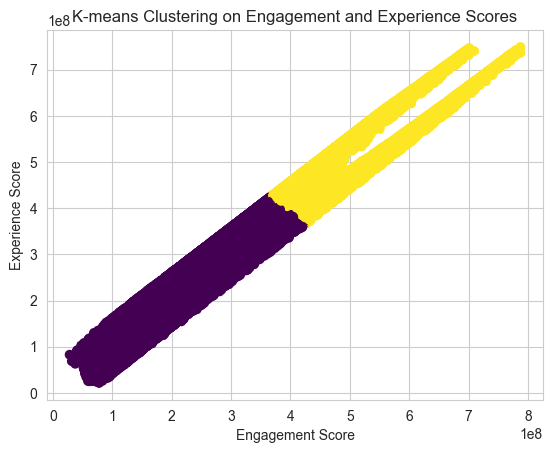

In [111]:
plt.scatter(df['engagement_score'], df['experience_score'], c=df['satisfaction_cluster'], cmap='viridis')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('K-means Clustering on Engagement and Experience Scores')
plt.show()


In [ ]:
print('Average Satisfaction and Experience Scores per Cluster')
df.groupby('satisfaction_cluster')[['satisfaction_score', 'experience_score']].mean()

Average Satisfaction and Experience Scores per Cluster


,satisfaction_score,experience_score
satisfaction_cluster,,
0,2.732147e+08,2.738498e+08
1,5.199482e+08,5.185478e+08


## <font color = '#DF9166' size=6>**Export to Database**</font><a class = 'anchor' id = 'export_database'/>

In [117]:
load_dotenv()

DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")

connection_string = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'

# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Convert uint64 columns to int64
df = df.apply(lambda x: x.astype('int64') if x.dtype == 'uint64' else x)

# Assuming 'df' is the DataFrame you want to export
# Export DataFrame to PostgreSQL (replace 'user_scores' with the desired table name)
df.to_sql('final_telecom_data', engine, index=False, if_exists='replace', chunksize=1000)


71534

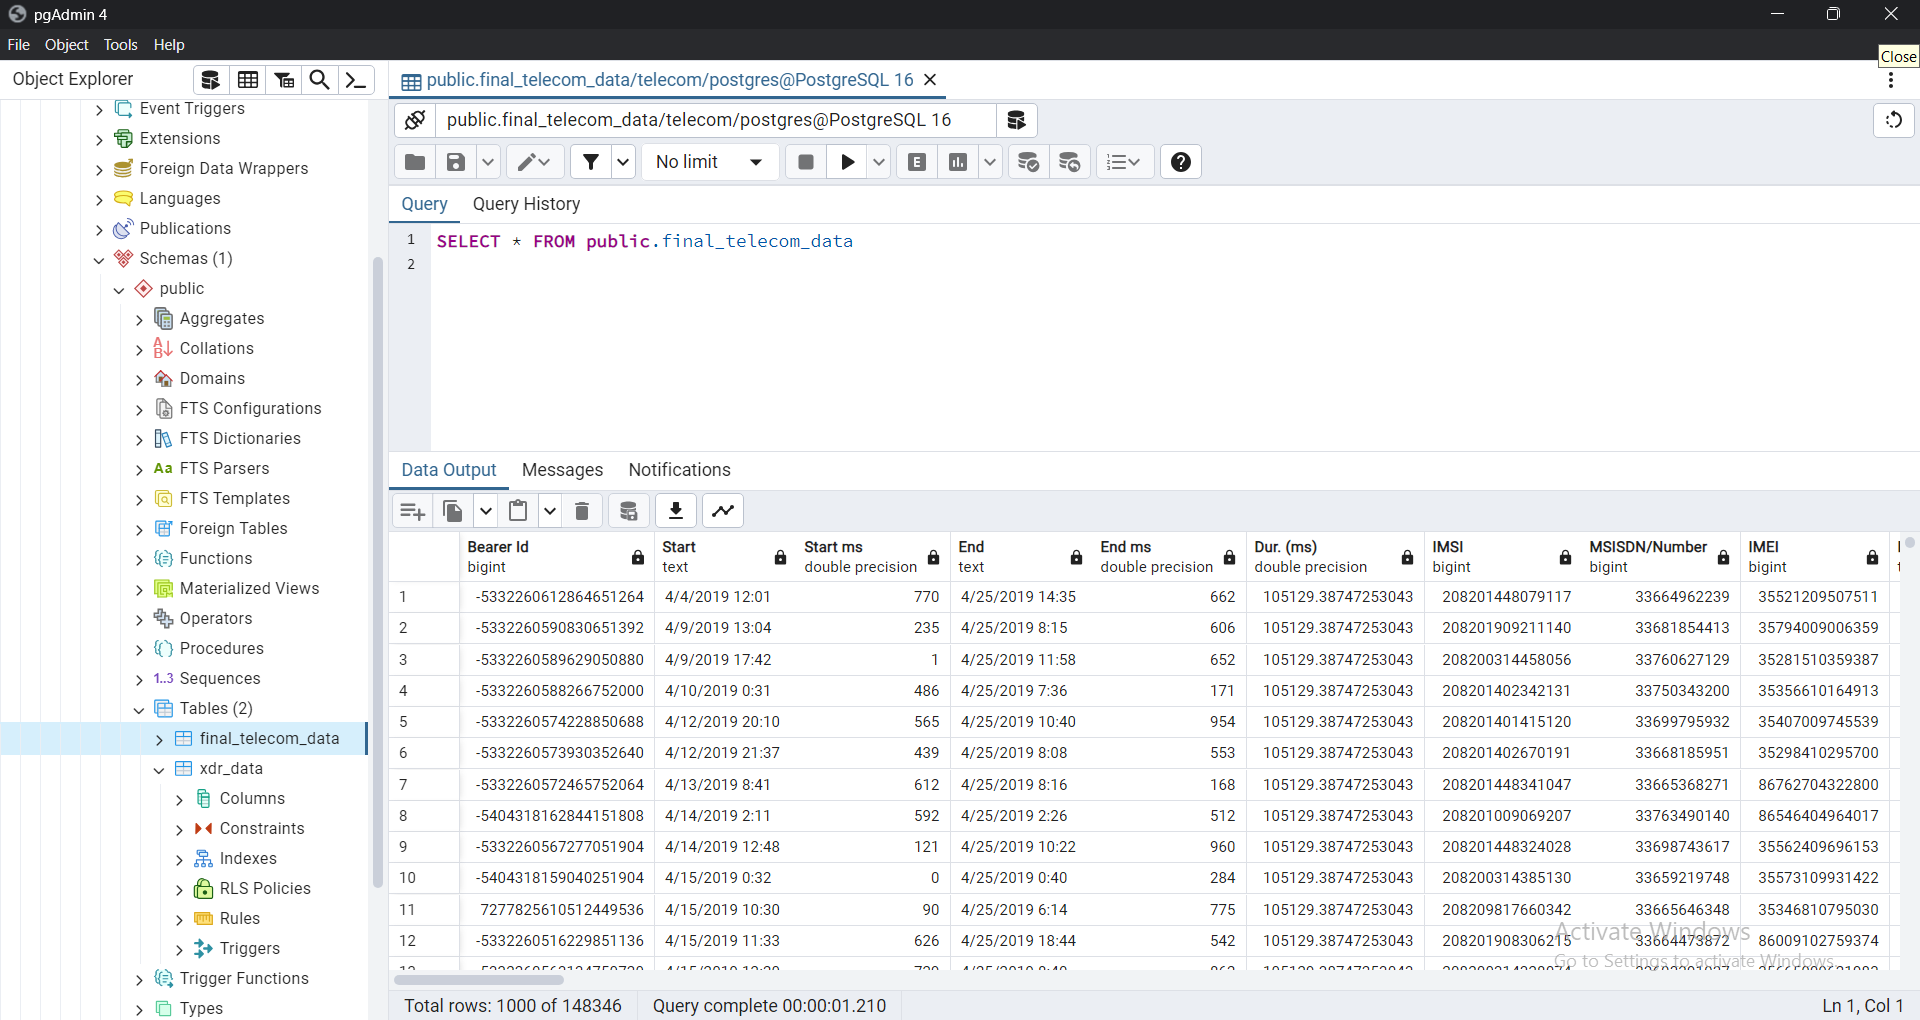

In [ ]:
df.to_csv('C:/dev/Side-Projects/10 Acadamy/W2 Challenge/User Engagement and Satisfaction Analysis/data/final_telecom_data.csv')